In [2]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
import imodels
import notebook_helper
import imodelsx.process_results
sys.path.append('../experiments/')
results_dir = '../results/marginal/'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/01_train_gam.py'
r = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
# r.to_pickle('../results/agg.pkl')
# imodelsx.process_results.delete_runs_in_dataframe(r[r.use_bagging_ensemble == 1], actually_delete=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 210/210 [00:00<00:00, 4503.62it/s]


In [3]:
r.dataset_name.value_counts()

dataset_name
diabetes         30
credit_g         30
heart            30
sonar            30
compas           30
juvenile         30
breast_cancer    30
Name: count, dtype: int64

In [5]:
ravg = notebook_helper.get_ravg_with_stability(r, experiment_filename=experiment_filename)

100%|██████████| 70/70 [00:00<00:00, 133.90it/s]


In [18]:
group_keys = [
    k
    for k in imodelsx.process_results.get_main_args_list(
        experiment_filename=experiment_filename
    )
    if not k == "seed"
]

df = pd.DataFrame(ravg)
df = (
    df.groupby(
        [
            k
            for k in group_keys
            if not k == "dataset_name" and not len(df[k].unique()) == 1
            and not k == 'fit_linear_marginal'
        ]
    )[["roc_auc_test", "instability"]]
    .mean()
    # .reset_index()
)

In [30]:
df.style.format("{:.3f}").background_gradient(cmap="Blues", axis=0)

In [32]:
df.reset_index().columns

Index(['n_boosting_rounds', 'n_boosting_rounds_marginal',
       'use_select_linear_marginal', 'decay_rate_towards_marginal',
       'roc_auc_test', 'instability'],
      dtype='object')

<Axes: xlabel='instability', ylabel='roc_auc_test'>

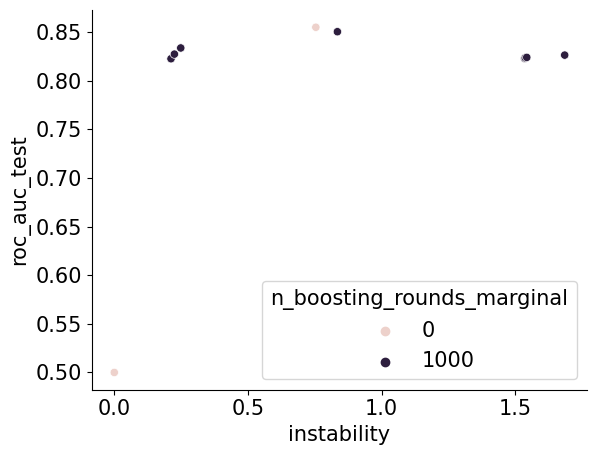

In [23]:
sns.scatterplot(
    data=df,
    x="instability",
    y="roc_auc_test",
    hue="n_boosting_rounds_marginal",
)

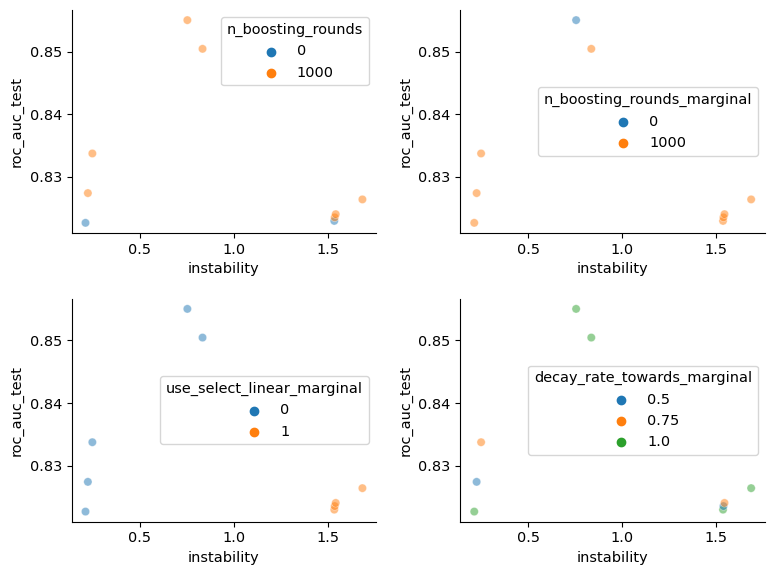

In [37]:
group_keys = [
    k
    for k in imodelsx.process_results.get_main_args_list(
        experiment_filename="01_train_gam.py"
    )
    if not k == "seed"
]

df = pd.DataFrame(ravg)
df = (
    df.groupby([k for k in group_keys if not k == "dataset_name"])[
        ["roc_auc_test", "instability"]
    ]
    .mean()
    .reset_index()
)
# df = df[~((df.n_boosting_rounds == 0) & (df.n_boosting_rounds_marginal == 0))]
df = df[df.roc_auc_test >= 0.8]
# df = df[df.boosting_strategy == 'cyclic']
# df = df[df.fit_linear_marginal == "None"]
# df = df[df.n_boosting_rounds == 0]
# df = df[df.n_boosting_rounds_marginal == 5]
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

kwargs = dict(
    data=df,
    x="instability",
    y="roc_auc_test",
    palette="tab10",
    alpha=0.5,
)
ks = [
    "n_boosting_rounds",
    "n_boosting_rounds_marginal",
    "use_select_linear_marginal",
    "decay_rate_towards_marginal",
]
for i, k in enumerate(ks):
    ax = axes.flatten()[i]
    sns.scatterplot(
        **kwargs,
        hue=k,
        ax=ax,
    )
    ax.legend(fontsize="x-small", title=k, title_fontsize="x-small")
    # make all fontsizes small
    for item in (
        [ax.title, ax.xaxis.label, ax.yaxis.label]
        + ax.get_xticklabels()
        + ax.get_yticklabels()
    ):
        item.set_fontsize("x-small")

plt.show()

In [35]:


# df = df[df.roc_auc_test >= 0.8]
# df = df[df.n_boosting_rounds == 0]
# # df = df[df.n_boosting_rounds_marginal == 0]
# fig, axes = plt.subplots(1, 1, figsize=(6, 3))
# axes = np.array(axes).reshape(1, 1)

# kwargs = dict(
#     data=df,
#     x="instability",
#     y="roc_auc_test",
#     palette="tab10",
#     alpha=0.5,
# )
# ks = ["bagging_ensemble"]
# for i, k in enumerate(ks):
#     ax = axes.flatten()[i]
#     sns.lineplot(**kwargs, hue=k, ax=ax, marker="o")
#     # put legend outside of plot
#     ax.legend(
#         fontsize="x-small",
#         title=k,
#         title_fontsize="x-small",
#         loc="upper left",
#         bbox_to_anchor=(1.05, 1),
#     )
#     # make all fontsizes small
#     for item in (
#         [ax.title, ax.xaxis.label, ax.yaxis.label]
#         + ax.get_xticklabels()
#         + ax.get_yticklabels()
#     ):
#         item.set_fontsize("x-small")
# plt.tight_layout()
# plt.show()